# Collaboration and Competition


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from unityagents import UnityEnvironment
from agent import Agent
from ddpg_learning import ddpg

In [2]:
# Initialize the Environment
env = UnityEnvironment(file_name="Tennis.app")

# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Get the action size
action_size = brain.vector_action_space_size

# Get the state size
state_size = len(env_info.vector_observations[0])

# Get number of agents
num_agents = len(env_info.agents)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
#Initialize the Agent with given hyperparameters

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256       # batch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
UPDATE_EVERY = 1        # how often to update the network

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #Torch device to use

agent = Agent(state_size=state_size,
              action_size=action_size,
              num_agents=num_agents,
              buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE,
              gamma=GAMMA,
              tau=TAU,
              learning_rate_actor=LR_ACTOR,
              learning_rate_critic=LR_CRITIC,
              device=device,
              update_every=UPDATE_EVERY,
              random_seed=42)


In [4]:
# Train the agent

AVERAGE_SCORE_SOLVED=0.5

scores, num_episodes_solved = ddpg(env=env,
                                   agent=agent,
                                   num_agents=num_agents,
                                   average_score_solved=AVERAGE_SCORE_SOLVED)


Episode 100	Average Score: 0.01	Max Score: 0.00
total timesteps: 1644
Episode 200	Average Score: 0.01	Max Score: 0.00
total timesteps: 3219
Episode 300	Average Score: 0.00	Max Score: 0.00
total timesteps: 4647
Episode 400	Average Score: 0.00	Max Score: 0.00
total timesteps: 6067
Episode 500	Average Score: 0.00	Max Score: 0.00
total timesteps: 7486
Episode 600	Average Score: 0.00	Max Score: 0.00
total timesteps: 8914
Episode 700	Average Score: 0.00	Max Score: 0.00
total timesteps: 10338
Episode 800	Average Score: 0.00	Max Score: 0.00
total timesteps: 11774
Episode 900	Average Score: 0.00	Max Score: 0.00
total timesteps: 13242
Episode 1000	Average Score: 0.04	Max Score: 0.10
total timesteps: 15577
Episode 1100	Average Score: 0.10	Max Score: 0.20
total timesteps: 19416
Episode 1200	Average Score: 0.13	Max Score: 0.10
total timesteps: 24951
Episode 1300	Average Score: 0.14	Max Score: 0.10
total timesteps: 31514
Episode 1400	Average Score: 0.25	Max Score: 0.30
total timesteps: 42181
Episode

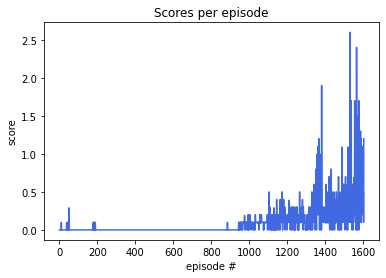

In [5]:
#Plot the training session (scores per episode averaged across all agents)

def plot_scores(scores):
    plt.plot(scores, color='royalblue')
    plt.title('Scores per episode')
    plt.ylabel('score')
    plt.xlabel('episode #')
    plt.show()
    
plot_scores(scores)


In [6]:
#See the trained agent in action.

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations              # get the current state

#Uncomment these lines to use a saved checkpoint:
#agent = Agent(state_size=state_size,
#              action_size=action_size,
#              num_agents=num_agents,
#              buffer_size=BUFFER_SIZE,
#              batch_size=BATCH_SIZE,
#              gamma=GAMMA,
#              tau=TAU,
#              learning_rate_actor=LR_ACTOR,
#              learning_rate_critic=LR_CRITIC,
#              device=device,
#              update_every=UPDATE_EVERY,
#              random_seed=42)
#agent.actor_local.load_state_dict(torch.load('solved_checkpoint_actor.pth'))

scores = np.zeros(num_agents) 
while True:
    actions = agent.act(states, add_noise=False)   # select an action
    env_info = env.step(actions)[brain_name]       # send the action to the environment
    next_states = env_info.vector_observations     # get the next state
    rewards = env_info.rewards                     # get the reward
    dones = env_info.local_done                    # see if episode has finished
    states = next_states                           # roll over the state to next time step
    scores += rewards                              # update the score
    if np.any(dones):                              # exit loop if episode finished
        break
    
print("Average Score: {}".format(np.mean(scores)))


Average Score: 2.600000038743019


In [7]:
scores


array([2.60000004, 2.60000004])

In [ ]:
env.close()

In [ ]:
##
#batch size (smaller?) - (remove batch norm?)
#buffer size 20-30k?
#update less

#weight decay?
#smaller model - no falloff?
#reduce model size more
#learning rate 
#noise

#use 2 agents (maddgp)

(64,32)(64,32,16)
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256       # batch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
UPDATE_EVERY = 1        # how often to update the network

Episode 100	Average Score: 0.00	Max Score: 0.00
Episode 200	Average Score: 0.00	Max Score: 0.00
Episode 300	Average Score: 0.00	Max Score: 0.00
Episode 400	Average Score: 0.00	Max Score: 0.00
Episode 500	Average Score: 0.00	Max Score: 0.00
Episode 600	Average Score: 0.00	Max Score: 0.00
Episode 700	Average Score: 0.00	Max Score: 0.00
Episode 800	Average Score: 0.00	Max Score: 0.00
Episode 900	Average Score: 0.00	Max Score: 0.00
Episode 1000	Average Score: 0.00	Max Score: 0.00
Episode 1100	Average Score: 0.01	Max Score: 0.10
Episode 1200	Average Score: 0.05	Max Score: 0.10
Episode 1300	Average Score: 0.14	Max Score: 0.10
Episode 1400	Average Score: 0.22	Max Score: 1.30
Episode 1500	Average Score: 0.43	Max Score: 0.20
Episode 1597	Average Score: 0.51	Max Score: 2.50
Environment solved in 1497 episodes!	Average Score: 0.51

Environment solved in 1268 episodes!	Average Score: 0.51
    
    Episode 1000	Average Score: 0.00	Max Score: 0.00
total timesteps: 14672
Episode 1100	Average Score: 0.01	Max Score: 0.00
total timesteps: 16220
Episode 1200	Average Score: 0.04	Max Score: 0.00
total timesteps: 18318
Episode 1300	Average Score: 0.02	Max Score: 0.10
total timesteps: 20249
Episode 1400	Average Score: 0.08	Max Score: 0.10
total timesteps: 23950
Episode 1500	Average Score: 0.13	Max Score: 0.10
total timesteps: 29818
Episode 1600	Average Score: 0.22	Max Score: 0.10
total timesteps: 39271
Episode 1700	Average Score: 0.21	Max Score: 0.10
total timesteps: 47980
Episode 1800	Average Score: 0.22	Max Score: 0.30
total timesteps: 56819
Episode 1900	Average Score: 0.43	Max Score: 1.50
total timesteps: 73905
Episode 1918	Average Score: 0.50	Max Score: 2.60
Environment solved in 1818 episodes!	Average Score: 0.50

Episode 1000	Average Score: 0.04	Max Score: 0.10
total timesteps: 15577
Episode 1100	Average Score: 0.10	Max Score: 0.20
total timesteps: 19416
Episode 1200	Average Score: 0.13	Max Score: 0.10
total timesteps: 24951
Episode 1300	Average Score: 0.14	Max Score: 0.10
total timesteps: 31514
Episode 1400	Average Score: 0.25	Max Score: 0.30
total timesteps: 42181
Episode 1500	Average Score: 0.23	Max Score: 0.50
total timesteps: 52030
Episode 1600	Average Score: 0.49	Max Score: 0.60
total timesteps: 71309
Episode 1604	Average Score: 0.50	Max Score: 1.20
Environment solved in 1504 episodes!	Average Score: 0.50

(64,32)(64,32,16)
BUFFER_SIZE = int(1e4)  # replay buffer size
BATCH_SIZE = 1024       # batch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
UPDATE_EVERY = 1        # how often to update the network

Episode 100	Average Score: 0.01	Max Score: 0.00
Episode 200	Average Score: 0.00	Max Score: 0.00
Episode 300	Average Score: 0.01	Max Score: 0.19
Episode 400	Average Score: 0.01	Max Score: 0.00
Episode 500	Average Score: 0.00	Max Score: 0.00
Episode 600	Average Score: 0.02	Max Score: 0.10
Episode 700	Average Score: 0.05	Max Score: 0.10
Episode 800	Average Score: 0.05	Max Score: 0.00
Episode 900	Average Score: 0.00	Max Score: 0.00
Episode 1000	Average Score: 0.03	Max Score: 0.10
Episode 1100	Average Score: 0.12	Max Score: 0.10
Episode 1200	Average Score: 0.16	Max Score: 0.20
Episode 1300	Average Score: 0.21	Max Score: 0.10
Episode 1400	Average Score: 0.13	Max Score: 0.20
Episode 1414	Average Score: 0.14	Max Score: 0.10

(64,32)(64,32,16)
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256       # batch size
GAMMA = 1.0            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
UPDATE_EVERY = 1        # how often to update the network

Episode 700	Average Score: 0.01	Max Score: 0.00
total timesteps: 10430
Episode 800	Average Score: 0.04	Max Score: 0.00
total timesteps: 12662
Episode 900	Average Score: 0.07	Max Score: 0.20
total timesteps: 16227
Episode 1000	Average Score: 0.11	Max Score: 0.50
total timesteps: 21564
Episode 1100	Average Score: 0.12	Max Score: 0.19
total timesteps: 26823
Episode 1200	Average Score: 0.22	Max Score: 0.00
total timesteps: 35772
Episode 1300	Average Score: 0.47	Max Score: 0.00
total timesteps: 54395
Episode 1328	Average Score: 0.50	Max Score: 1.70
Environment solved in 1228 episodes!	Average Score: 0.50